### Linear Regression with loss as Mean Absolute Error - with Analytic & PyTorch

Autograd MAE Parameters: w = [[2.596632]], b = [[4.5367436]]
Manual MAE Parameters:   w = [[2.59663296]], b = [[4.53673443]]


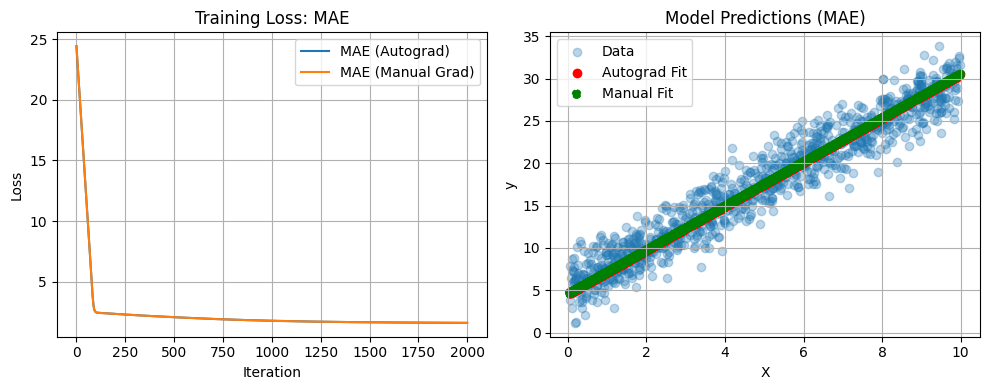

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Set random seeds
np.random.seed(42)
torch.manual_seed(42)

# Generate synthetic data
m = 1000
X_np = np.random.rand(1, m) * 10
noise = np.random.randn(1, m) * 2
y_np = 2.5 * X_np + 5 + noise

# Convert to tensors
X = torch.tensor(X_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32)


# Initialize shared random parameters
w_init = np.random.randn(1, 1)
b_init = np.random.randn(1, 1)

# Hyperparameters
alpha = 0.01
n_iter = 2000

# 1. MAE with autograd
def train_mae_autograd(X, y, w_init, b_init):
    w = torch.tensor(w_init, dtype=torch.float32, requires_grad=True)
    b = torch.tensor(b_init, dtype=torch.float32, requires_grad=True)

    losses = []

    for _ in range(n_iter):
        z = w @ X + b
        loss = torch.sum(torch.abs(z - y)) / m
        losses.append(loss.item())

        loss.backward()

        with torch.no_grad():
            w -= alpha * w.grad
            b -= alpha * b.grad

        w.grad.zero_()
        b.grad.zero_()

    return losses, w.detach(), b.detach()

# 2. MAE with manual gradients
def train_mae_manual(X, y, w_init, b_init):
    w = w_init.copy()
    b = b_init.copy()

    losses = []

    for _ in range(n_iter):
        z = w @ X + b
        loss = np.sum(np.abs(z - y)) / m

        # Backward pass: compute gradients   
        dw = (1/m)*X @ np.sign(z-y).T
        db = (1/m)*np.ones((1,m)) @ np.sign(z-y).T        

        w -= alpha * dw
        b -= alpha * db

        losses.append(loss)

    return losses, w, b

# Train both models
losses_autograd, w_auto, b_auto = train_mae_autograd(X, y, w_init, b_init)
losses_manual, w_manual, b_manual = train_mae_manual(X_np, y_np, w_init, b_init)

# Print final parameters
w_auto_np = w_auto.detach().numpy()
b_auto_np = b_auto.detach().numpy()
print(f"Autograd MAE Parameters: w = {w_auto_np}, b = {b_auto_np}")
print(f"Manual MAE Parameters:   w = {w_manual}, b = {b_manual}")

# Plot losses
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(losses_autograd, label='MAE (Autograd)')
plt.plot(losses_manual, label='MAE (Manual Grad)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss: MAE')
plt.legend()
plt.grid(True)

# Plot predictions
y_pred_auto = (w_auto_np.T @ X_np + b_auto_np)
y_pred_manual = (w_manual.T @ X_np + b_manual)

plt.subplot(1, 2, 2)
plt.scatter(X_np, y_np, label='Data', alpha=0.3)
plt.scatter(X_np, y_pred_auto, label='Autograd Fit', color='red')
plt.scatter(X_np, y_pred_manual, label='Manual Fit', color='green', linestyle='--')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model Predictions (MAE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
